No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


Text(0.5, 0, 'Time [BJD - 2457000]')

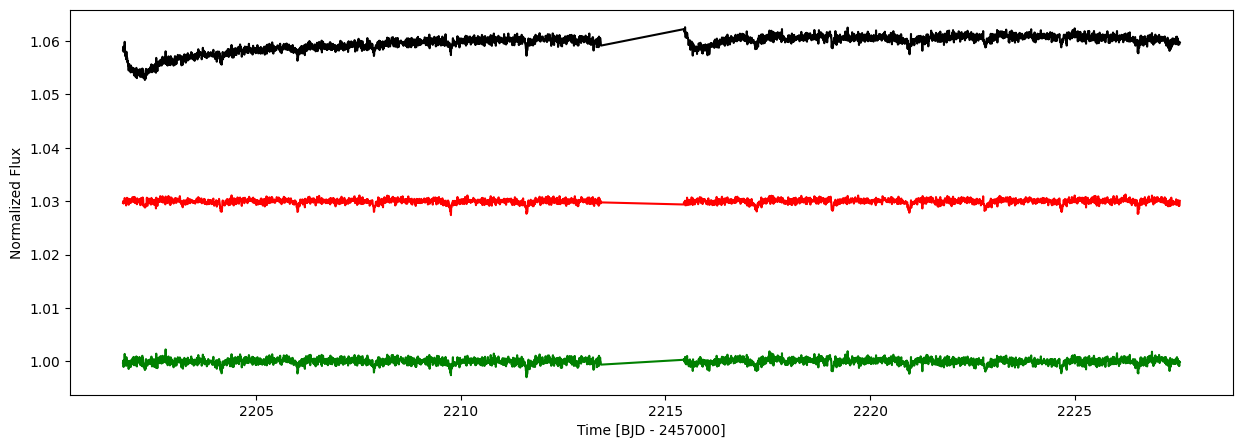

In [4]:
import warnings
warnings.filterwarnings('ignore')
import eleanor
from astropy import units as u
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk
%matplotlib inline

star = eleanor.Source(tic=124709665)

star.tic, star.coords, star.gaia

data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=False, do_pca=True, regressors='corner')
plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]) + 0.06, 'k')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.03, 'r')
plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]), 'g')
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')

<AxesSubplot: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux'>

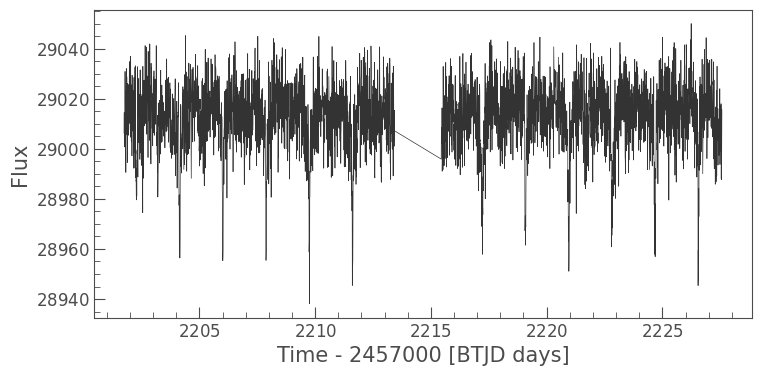

In [6]:
lc = data.to_lightkurve()
lc.plot()

<Quantity 1.86768677 d>

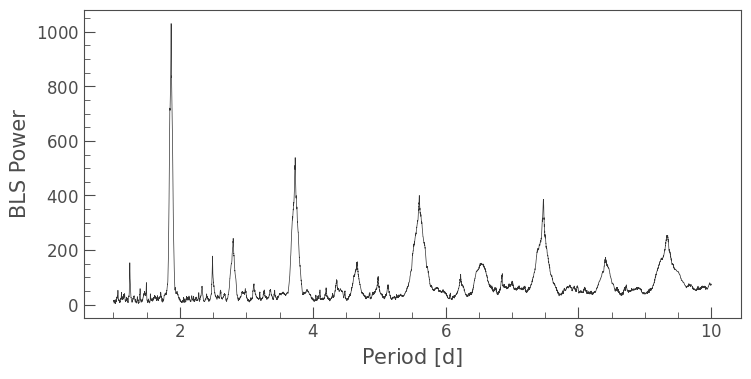

In [12]:
period = np.linspace(1, 10, 10000)

bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500)
bls.plot()

prelim_period = bls.period_at_max_power
prelim_t0 = bls.transit_time_at_max_power
prelim_dur = bls.duration_at_max_power

prelim_period

